In [2]:
import json

tweets_data_path = '../data/twitter_data_zika.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")


for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        pass 

print("This document contains %d tweets.\n" %(len(tweets_data)))

print("The keys for the tweet are: \n")
test_tweet = tweets_data[0]
print("\n".join(test_tweet.keys()))

This document contains 11939 tweets.

The keys for the tweet are: 

is_quote_status
coordinates
timestamp_ms
id_str
favorited
quoted_status_id_str
possibly_sensitive
quoted_status
entities
user
lang
favorite_count
retweet_count
in_reply_to_screen_name
in_reply_to_status_id_str
place
id
retweeted
in_reply_to_status_id
geo
source
quoted_status_id
contributors
filter_level
in_reply_to_user_id
truncated
text
in_reply_to_user_id_str
created_at


In [12]:
# langList = [tmpTweet['lang'] for tmpTweet in tweets_data]

In [13]:
type(tweets_data)
print(len(tweets_data)+1)

11940


In [3]:
%matplotlib inline

import matplotlib
import pandas as pd
import matplotlib.pyplot as plt

tweetsDataFrame = pd.DataFrame()

for idx in range(1,len(tweets_data)+1):
    try:
        rowTmp = tweets_data[idx]
        t = rowTmp['text']
        l = rowTmp['lang']
        lats = rowTmp['geo']['coordinates'][0]
        lons = rowTmp['geo']['coordinates'][1]
        tmp = pd.DataFrame({'text': t, 'lang': l, 'lats': lats, 'lons': lons}, index=[idx])
        tweetsDataFrame = pd.concat([tweetsDataFrame, tmp])
    except:
        pass
    
print(len(tweetsDataFrame))

59


In [4]:
print(tweetsDataFrame)

      lang       lats        lons  \
366     da  50.774775    5.470622   
850     en  30.326331  -81.653395   
1902    pt -23.963427  -46.307066   
2299    pt -16.692271  -49.317574   
3858    en  33.168701  -96.961601   
3957    en  29.881399  -95.454399   
3972    en  29.746300  -95.447502   
3987    en  29.910801  -95.337898   
4000    en  32.964500  -96.984901   
4001    en  29.700600  -95.585701   
4017    en  29.393801  -95.245102   
4028    en  29.175301  -95.453102   
4055    en  29.708300  -95.465897   
4065    en  29.748301  -95.488899   
4079    en  30.297899  -94.905098   
4093    en  29.767599  -95.158798   
4114    en  30.304001  -95.431297   
4125    en  29.914499  -95.653099   
4140    en  30.065800  -94.905502   
4168    en  29.713800  -95.116997   
4175    en  29.456600  -95.043999   
4191    en  29.750200  -95.367699   
4218    en  29.545500  -95.468399   
4251    en  29.740101  -95.233299   
4262    en  29.306801  -94.771896   
4275    en  29.798300  -95.419098   
4

In [18]:
test_tweet = tweets_data[366]
print(test_tweet.keys())

dict_keys(['retweet_count', 'lang', 'user', 'possibly_sensitive', 'text', 'coordinates', 'id', 'in_reply_to_status_id', 'is_quote_status', 'favorite_count', 'filter_level', 'in_reply_to_screen_name', 'timestamp_ms', 'retweeted', 'geo', 'in_reply_to_user_id', 'source', 'in_reply_to_user_id_str', 'id_str', 'contributors', 'place', 'in_reply_to_status_id_str', 'truncated', 'entities', 'created_at', 'favorited'])


In [19]:
print(test_tweet['coordinates'])
print(test_tweet['user'].keys())
print(test_tweet['user']['geo_enabled'])
print(test_tweet['geo'])


{'type': 'Point', 'coordinates': [5.47062188, 50.77477477]}
dict_keys(['verified', 'lang', 'profile_background_image_url_https', 'description', 'statuses_count', 'profile_image_url', 'id', 'followers_count', 'favourites_count', 'url', 'name', 'protected', 'profile_link_color', 'screen_name', 'profile_sidebar_border_color', 'profile_image_url_https', 'default_profile_image', 'profile_use_background_image', 'location', 'following', 'listed_count', 'profile_text_color', 'notifications', 'utc_offset', 'default_profile', 'profile_background_image_url', 'profile_sidebar_fill_color', 'follow_request_sent', 'profile_background_color', 'time_zone', 'friends_count', 'profile_banner_url', 'created_at', 'profile_background_tile', 'id_str', 'contributors_enabled', 'is_translator', 'geo_enabled'])
True
{'type': 'Point', 'coordinates': [50.77477477, 5.47062188]}


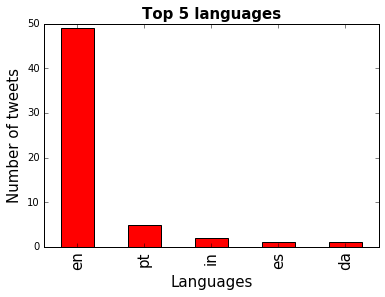

In [5]:
tweets_by_lang = tweetsDataFrame['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')


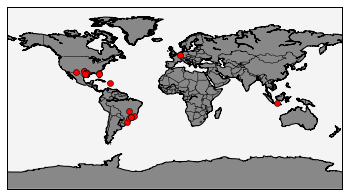

In [6]:
from mpl_toolkits.basemap import Basemap

# Set iPython to display visualization inline
%matplotlib inline

# Create a map, using the Gall–Peters projection, 
map = Basemap(projection='gall', 
              # with low resolution,
              resolution = 'l', 
              # And threshold 100000
              area_thresh = 100000.0,
              # Centered at 0,0 (i.e null island)
              lat_0=0, lon_0=0)

# Draw the coastlines on the map
map.drawcoastlines()

# Draw country borders on the map
map.drawcountries()

# Fill the land with grey
map.fillcontinents(color = '#888888')

# Draw the map boundaries
map.drawmapboundary(fill_color='#f4f4f4')

# Define our longitude and latitude points
# We have to use .values because of a wierd bug when passing pandas data
# to basemap.
x,y = map(tweetsDataFrame['lons'].values, tweetsDataFrame['lats'].values)

# Plot them using round markers of size 6
map.plot(x, y, 'ro', markersize=6)

# Show the map
plt.show()